### Predicting diabetes

#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Load and review data

In [3]:
df = pd.read_csv('./data/pima-data.csv')

In [4]:
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [8]:
df.std()

num_preg          3.369578
glucose_conc     31.972618
diastolic_bp     19.355807
thickness        15.952218
insulin         115.244002
bmi               7.884160
diab_pred         0.331329
age              11.760232
skin              0.628517
diabetes          0.476951
dtype: float64

In [9]:
df.isnull().values.any()

False

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


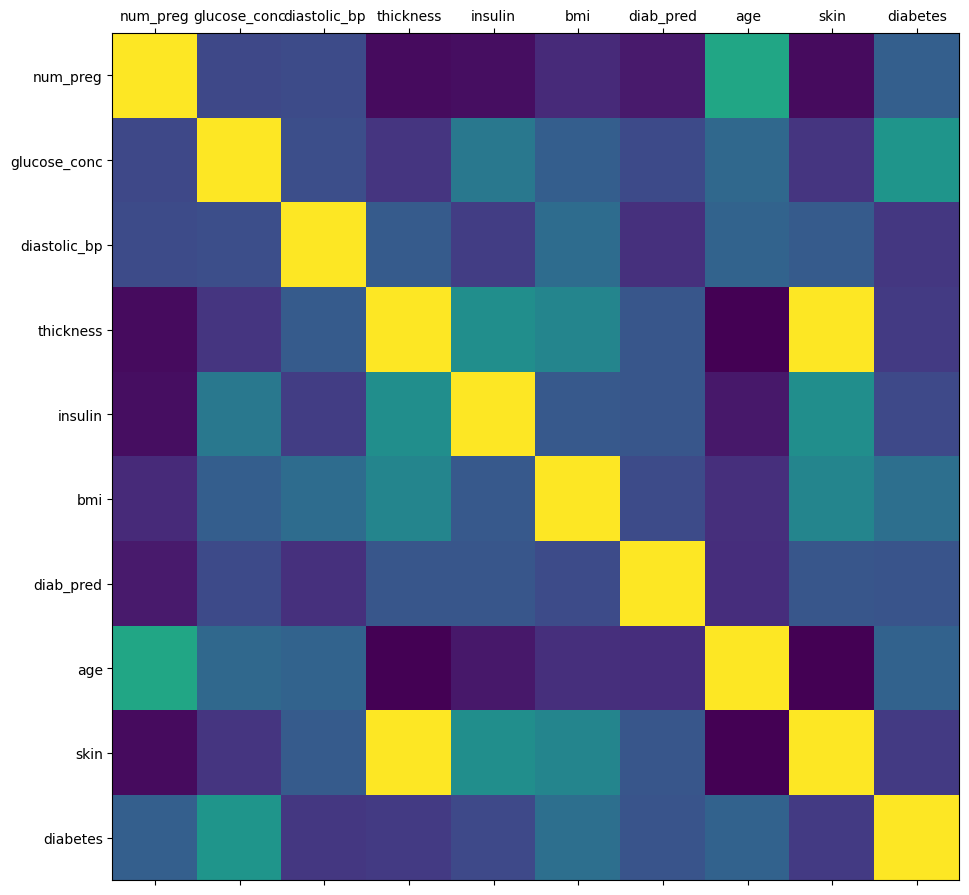

In [12]:
plot_corr(df)

In [13]:
del df['skin']

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


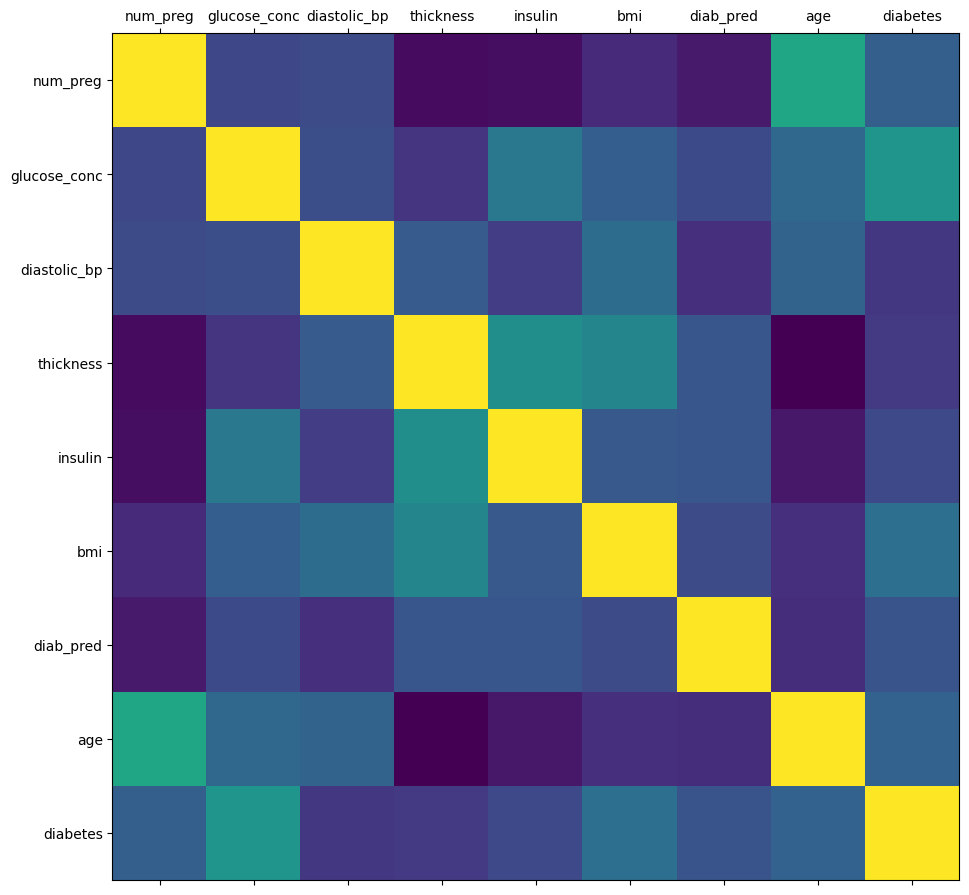

In [15]:
plot_corr(df)

#### Check data types

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


#### Mapping True to 1 and False to 0 in "diabetes" column

In [17]:
diabetes_map = {True :1 , False : 0}

In [18]:
df["diabetes"] = df["diabetes"].map(diabetes_map)

In [19]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Check for class distribution (rare events)

In [20]:
num_obs = len(df)
num_true = len(df.loc[df["diabetes"] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


### Splitting the data
#### 70% for training and 30% for testing

In [21]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values
y = df[predicted_class_names].values

split_test_size = 0.3

# random state is the random seed for spliting the data into train, test boxes
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size, random_state= 42)

In [23]:
len(y_train[y_train==1]), len(y_train), len(y_test)

(188, 537, 231)

In [24]:
df.count()
df.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

#### check to ensure the split is divided into 70% training data and 30% test data

In [25]:
len(df.index)

768

In [26]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [27]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


#### verifying the predicted values were split correctly

In [28]:
df.loc[df["diabetes"]==1]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [29]:
len(df.loc[df["diabetes"]==1]), len(df.index)

(268, 768)

In [30]:
len(y_train[y_train==1])

188

In [31]:
print("Original true: {0} ({1:0.2f}%)".format(len(df.loc[df["diabetes"]==1]), (len(df.loc[df['diabetes']==1])/len(df.index))*100))
print("Original false: {0} ({1:0.2f}%)".format(len(df.loc[df["diabetes"]==0]), (len(df.loc[df['diabetes']==0])/len(df.index))*100))
print("")
print("Training true: {0} ({1:0.2f}%)".format(len(y_train[y_train==1]), (len(y_train[y_train==1])/len(y_train))*100))
print("Training false: {0} ({1:0.2f}%)".format(len(y_train[y_train==0]), (len(y_train[y_train==0])/len(y_train))*100))
print("")
print("Test true: {0} ({1:0.2f}%)".format(len(y_test[y_test==1]), (len(y_test[y_test==1])/len(y_test))*100))
print("Test false: {0} ({1:0.2f}%)".format(len(y_test[y_test==0]), (len(y_test[y_test==0])/len(y_test))*100))

Original true: 268 (34.90%)
Original false: 500 (65.10%)

Training true: 188 (35.01%)
Training false: 349 (64.99%)

Test true: 80 (34.63%)
Test false: 151 (65.37%)


#### Post split data preparation

check for hidden missing values

In [32]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with mean

Imputing :  Replacing missing values with mean or median or something else

In [34]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0,strategy="mean")
fill_0

SimpleImputer(missing_values=0)

In [35]:
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

len(x_train[x_train[:,2]==0])

0

In [36]:
print("# rows missing glucose_conc: {0}".format(len(x_train[x_train[:,1]==0])))
print("# rows missing diastolic_bp: {0}".format(len(x_train[x_train[:,2]==0])))
print("# rows missing thickness: {0}".format(len(x_train[x_train[:,3]==0])))
print("# rows missing insulin: {0}".format(len(x_train[x_train[:,4]==0])))
print("# rows missing bmi: {0}".format(len(x_train[x_train[:,5]==0])))
print("# rows missing diab_pred: {0}".format(len(x_train[x_train[:,6]==0])))
print("# rows missing age: {0}".format(len(x_train[x_train[:,7]==0])))

# rows missing glucose_conc: 0
# rows missing diastolic_bp: 0
# rows missing thickness: 0
# rows missing insulin: 0
# rows missing bmi: 0
# rows missing diab_pred: 0
# rows missing age: 0


### Training initial algorithm - Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model

GaussianNB()

In [38]:
y_train.ravel()

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [39]:
nb_model.fit(x_train,y_train.ravel())

GaussianNB()

#### Predictions

Predictions on training data

In [40]:
nb_model_predict_train = nb_model.predict(x_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_model_predict_train)))

Accuracy: 0.7542


Predictions on test data

In [41]:
nb_model_predict_test = nb_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_model_predict_test)))

Accuracy: 0.7359


Metrics

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [43]:
print("Confusion Matrix")

conf = confusion_matrix(y_test, nb_model_predict_test)
print("{0}".format(conf))

print("Classification Report")
print(classification_report(y_test, nb_model_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



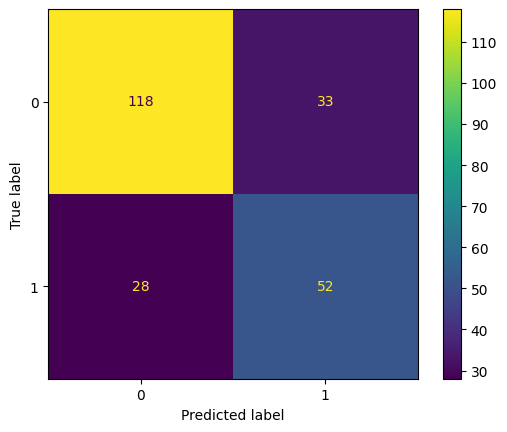

In [44]:
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=nb_model.classes_)
conf_disp.plot()
plt.show()

##### About precision and recall

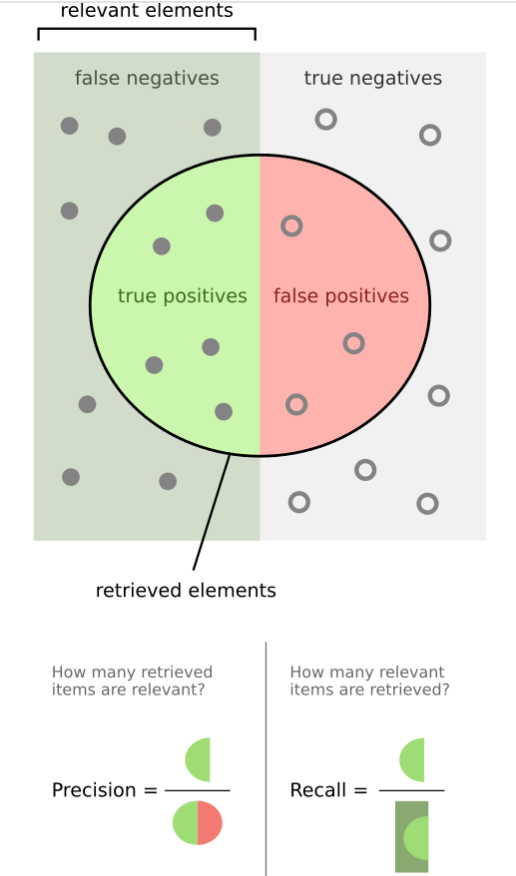

### Random Forest algorithm

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

Predicting training data

In [46]:
rf_model_predict_train = rf_model.predict(x_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_model_predict_train)))

Accuracy: 1.0000


Predicting test data

In [47]:
rf_model_predict_test = rf_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_model_predict_test)))

Accuracy: 0.7403


Confusion matrix and classification report

In [48]:
conf_rf = confusion_matrix(y_test, rf_model_predict_test)

print("Confusion Matrix")
print("{0}".format(conf_rf))

print("Classification Report")
print(classification_report(y_test, rf_model_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



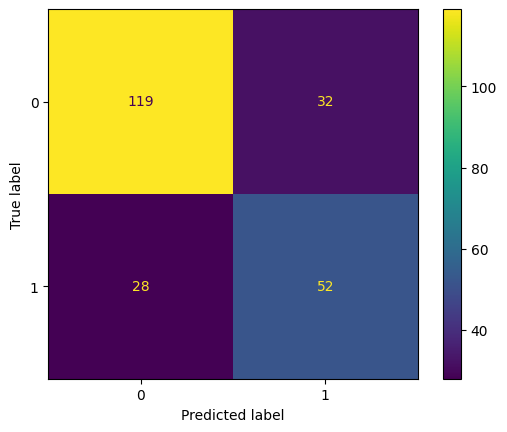

In [49]:
conf_rf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_rf, display_labels=rf_model.classes_)
conf_rf_disp.plot()
plt.show()

#### Overfitting

Using regularization hyperparameter $\color{yellow}\lambda$ to prevent overfitting. The regularization hyperparameter $\color{yellow}\lambda$ brings down the training data accuracy but significantly improves the real world predictions or test data predictions.

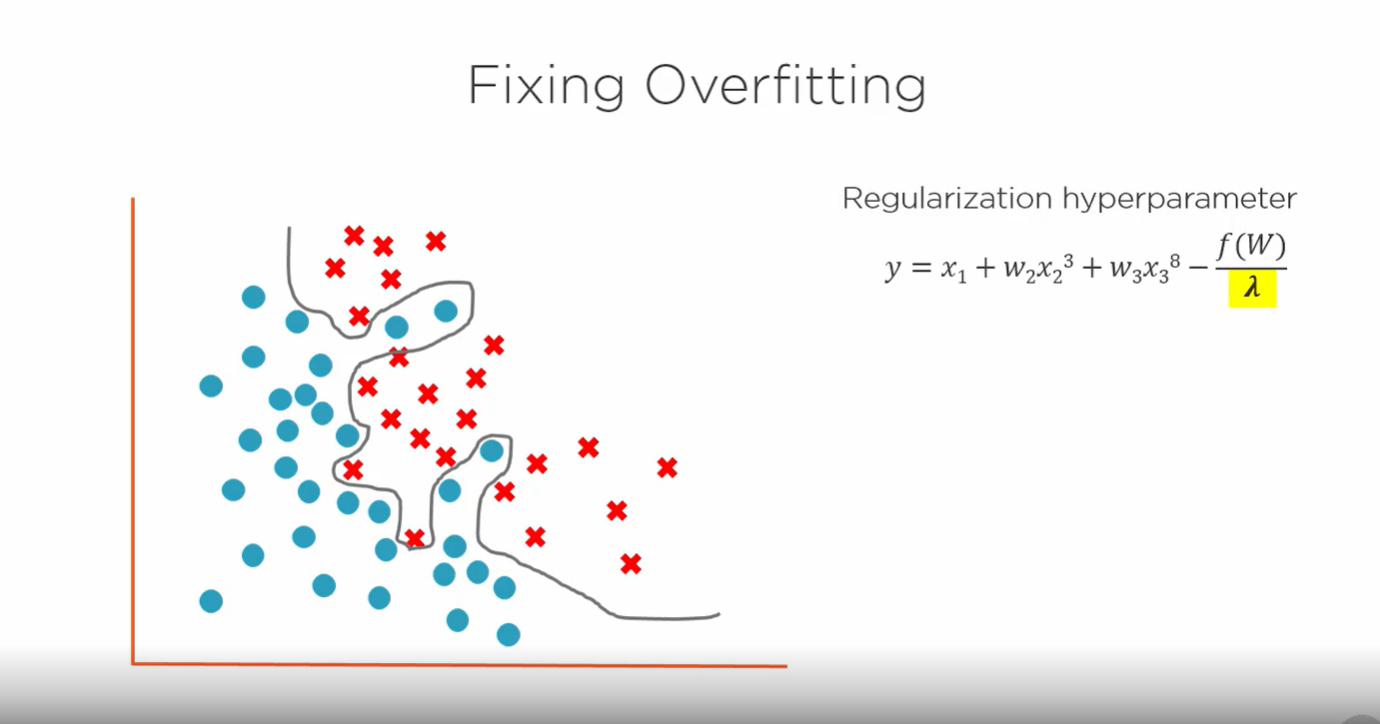

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, max_iter=1000)

lr_model.fit(x_train, y_train.ravel())

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

Training set predictions

In [51]:
lr_model_predict_train = lr_model.predict(x_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_model_predict_train)))

Accuracy: 0.7877


Test set predictions

In [52]:
lr_model_predict_test = lr_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_model_predict_test)))

Accuracy: 0.7359


Confusion matrix and classification report

In [53]:
conf_lr = confusion_matrix(y_test, lr_model_predict_test)

print("Confusion Matrix")
print("{0}".format(conf_lr))

print("Classification Report")
print(classification_report(y_test, lr_model_predict_test))

Confusion Matrix
[[123  28]
 [ 33  47]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



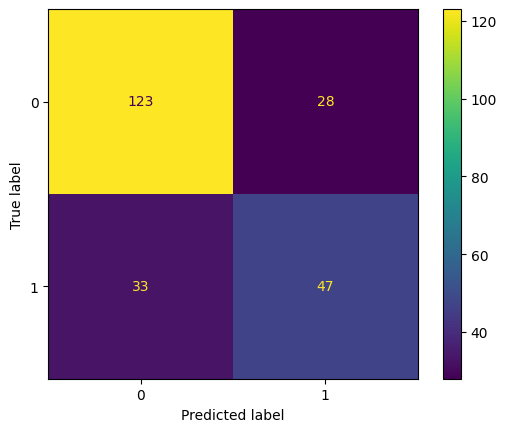

In [54]:
conf_lr_disp = ConfusionMatrixDisplay(confusion_matrix=conf_lr, display_labels=lr_model.classes_)
conf_lr_disp.plot()
plt.show()

We want a good recall score. So we increase the regularization hyperparameter $\color{yellow}C$ value slowly and check the $\textcolor{gray}{recall-score}$ against all $\color{yellow}C$ values. 

#### Varying the $\color{yellow}C$ value

In [70]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear' ,max_iter=4000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_model_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_model_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_model = lr_model_loop
    C_val += C_inc

In [71]:
recall_scores

[0.4625,
 0.4875,
 0.5125,
 0.525,
 0.5375,
 0.55,
 0.55,
 0.55,
 0.575,
 0.575,
 0.575,
 0.5875,
 0.6,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6]

In [74]:
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
best_score_C_val

1st max value of 0.613 occured at C=1.400


1.4000000000000001

Plot recall scores

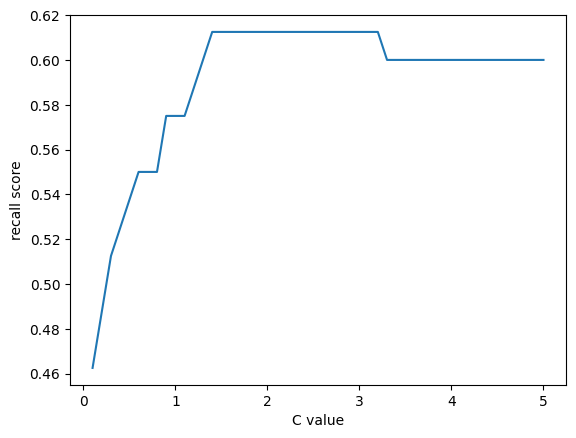

In [73]:
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
plt.show()

This low recall values can be due to unbalanced classes.

##### Unbalanced classes : Classes with different ratios. For e.g., $35\%$ diabetes with $65\%$ non-diabetes 

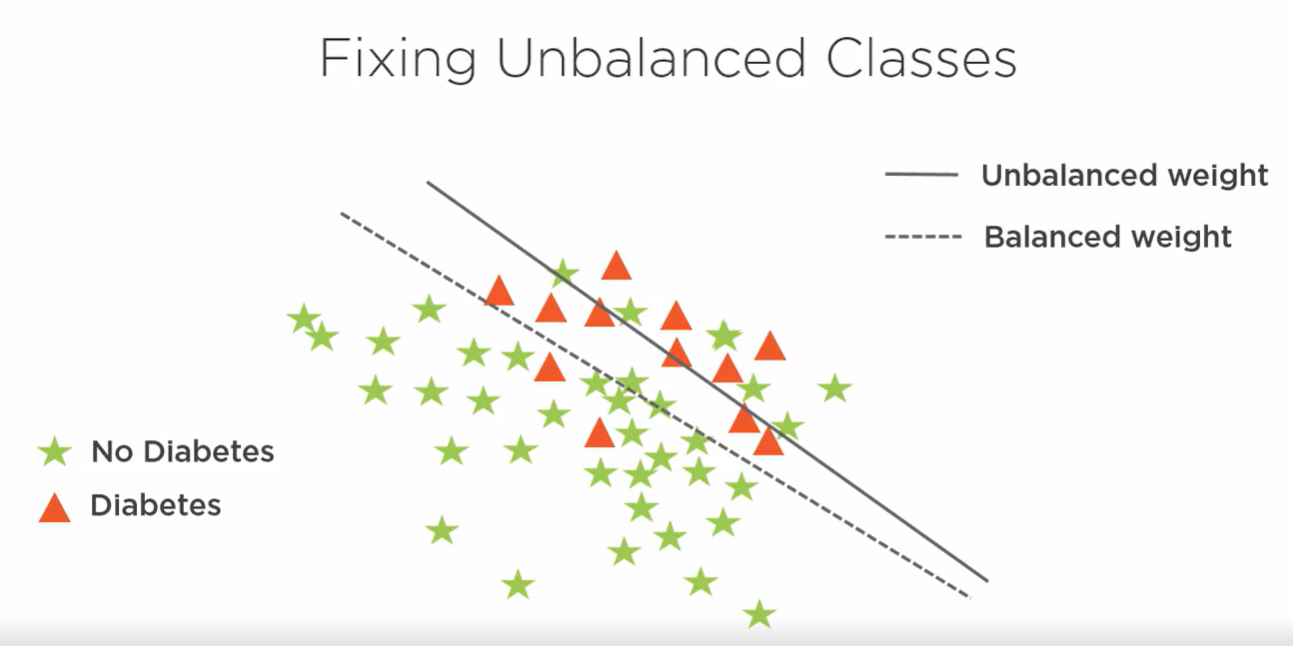

In [75]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val,class_weight= "balanced" , random_state=42, solver='liblinear', max_iter=4000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_model_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_model_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_model = lr_model_loop
    C_val += C_inc

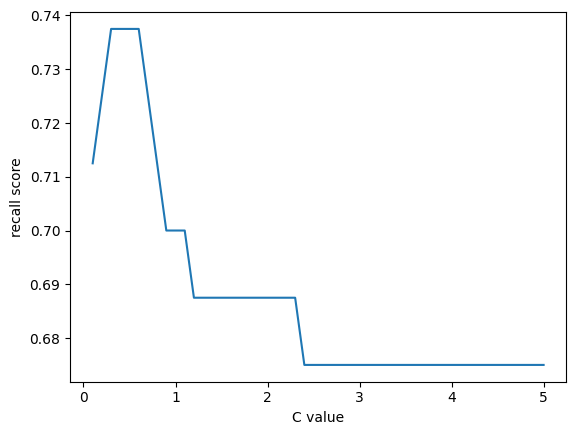

1st max value of 0.738 occured at C=0.300


In [80]:
C_values, recall_scores

C_values[recall_scores.index(best_recall_score)]

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
plt.show()

print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, C_values[recall_scores.index(best_recall_score)]))


In [81]:
lr_model = LogisticRegression(class_weight="balanced", C=C_values[recall_scores.index(best_recall_score)], random_state=42, solver='liblinear', max_iter=4000)

lr_model.fit(x_train, y_train.ravel())

lr_model_predict_test = lr_model.predict(x_test)

In [82]:
conf_lr = confusion_matrix(y_test, lr_model_predict_test)

print("Confusion Matrix")
print("{0}".format(conf_lr))

print("Classification Report")
print(classification_report(y_test, lr_model_predict_test))

Confusion Matrix
[[106  45]
 [ 21  59]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



#### Cross validation : Using a chunk of the training set as a validation set data and varying this chunk k times

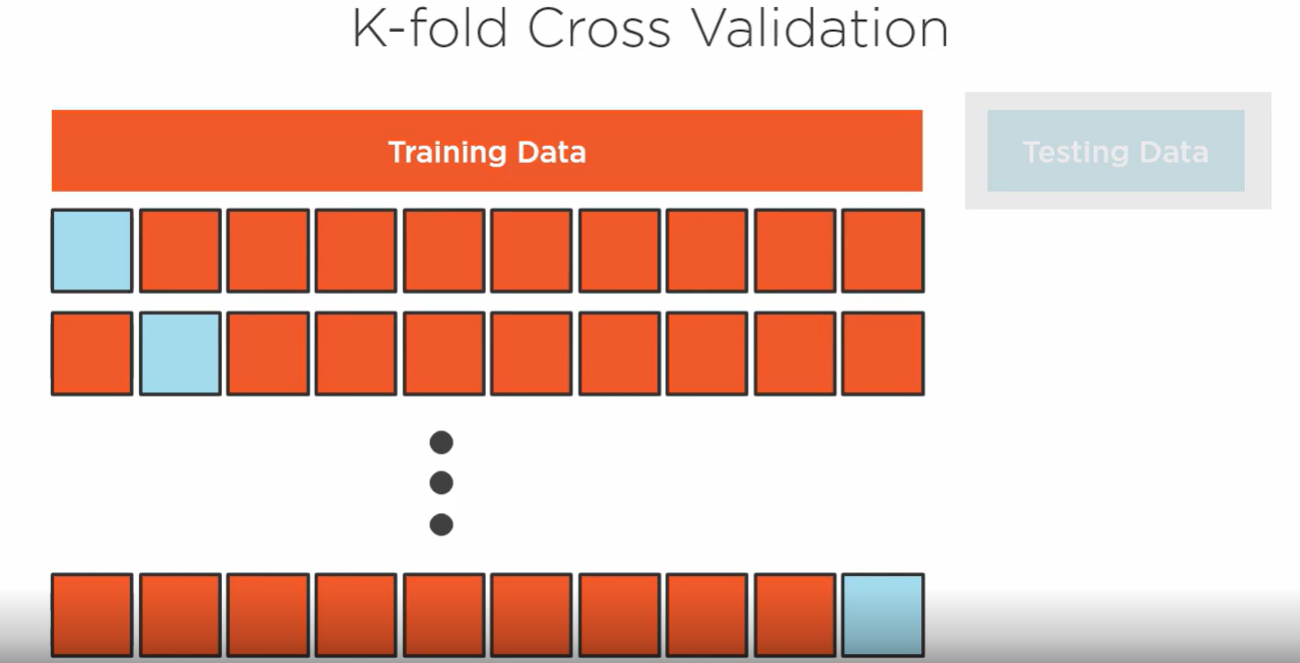

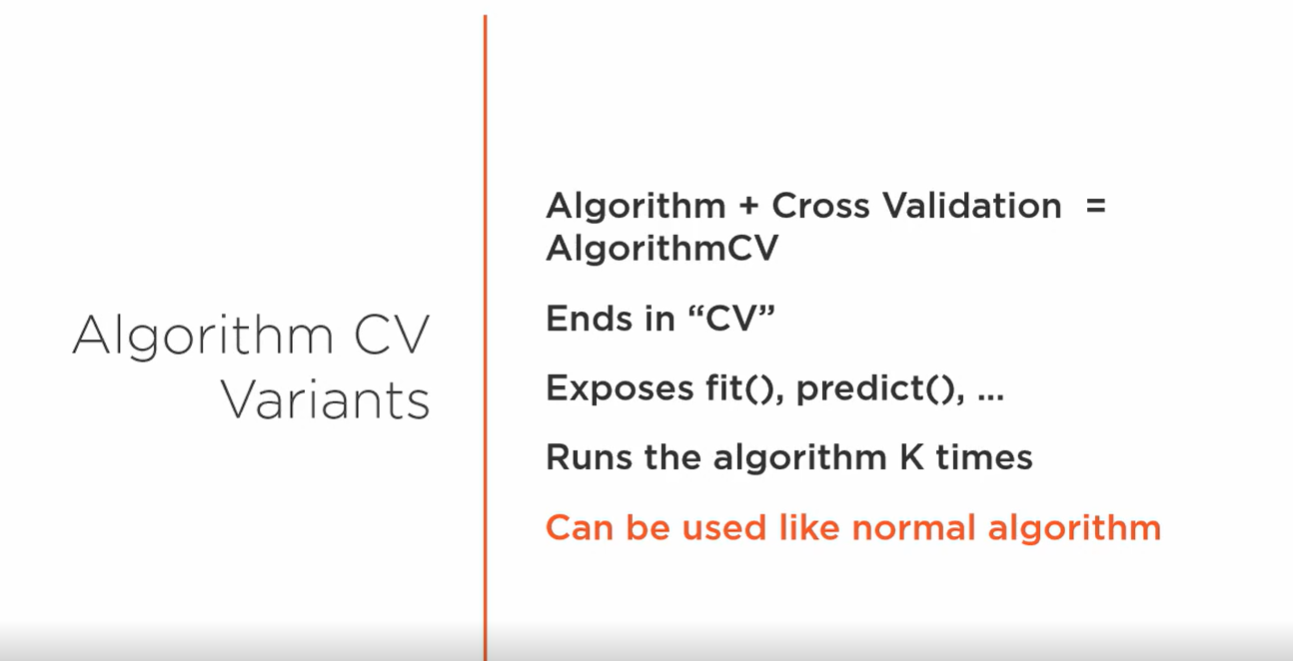

### Logistic Regression CV

In [83]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=4000)

lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=4000,
                     n_jobs=-1, random_state=42, refit=False)

In [86]:
lr_cv_model_predict_train = lr_cv_model.predict(x_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_model_predict_train)))

Accuracy: 0.7654


In [87]:
lr_cv_model_predict_test = lr_cv_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_model_predict_test)))

conf_lr_cv = confusion_matrix(y_test, lr_cv_model_predict_test)

print("Confusion Matrix")
print("{0}".format(conf_lr_cv))

print("Classification Report")
print(classification_report(y_test, lr_cv_model_predict_test))

Accuracy: 0.7013
Confusion Matrix
[[109  42]
 [ 27  53]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

